In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Read the CSV data
data = pd.read_csv("D:\Gold-price-prediction\ML_Project\ML_Project\data\saved\merged_data.csv", parse_dates=['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Sort data by date to ensure correct order
data.sort_index(inplace=True)

# Shift the target variable (gold_close) by 1 day
data['next_day_gold_close'] = data['gold_close'].shift(-1)

# Remove the last row since it doesn't have a target value
data.drop(data.tail(1).index, inplace=True)

In [23]:
data.dtypes

gold_open              float64
gold_high              float64
gold_low               float64
gold_close             float64
copper                 float64
crude_oil              float64
DXY                    float64
EURUSD                 float64
MSCI                   float64
NASDAQ                 float64
NLR                    float64
platinum               float64
RUT                    float64
silver                 float64
SP500                  float64
VIX                    float64
next_day_gold_close    float64
dtype: object

In [24]:
# Select features and target
features = ['copper', 'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum', 'RUT', 'silver', 'SP500', 'VIX']
target = 'next_day_gold_close'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(C=10, epsilon=0.5, gamma='scale', kernel='linear')   #Choose 
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

In [25]:
# Convert y_test to NumPy array
y_test_array = y_test.values

# Calculate MAPE (Mean Absolute Percentage Error) as a decimal
mape = np.mean(np.abs((y_test_array - y_pred) / y_test_array))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_array, y_pred))

# Calculate R2 Score
r2 = r2_score(y_test_array, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Percentage Error (MAPE): 0.0311
Root Mean Squared Error (RMSE): 68.8067
R2 Score: 0.9466


Validation re-test (check overfitting)

In [26]:
# Read the CSV data
data = pd.read_csv("D:\Gold-price-prediction\ML_Project\ML_Project\data\saved\merged_data.csv", parse_dates=['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Sort data by date to ensure correct order
data.sort_index(inplace=True)

# Shift the target variable (gold_close) by 1 day
data['next_day_gold_close'] = data['gold_close'].shift(-1)

# Remove the last row since it doesn't have a target value
data.drop(data.tail(1).index, inplace=True)

# Select features and target
features = ['copper', 'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum', 'RUT', 'silver', 'SP500', 'VIX']
target = 'next_day_gold_close'

X = data[features]
y = data[target]

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)  # Scale the validation set

# Create and train the SVR model
svr = SVR(C=10, epsilon=0.5, gamma='scale', kernel='linear')   #Choose 
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)
y_val_pred = svr.predict(X_val_scaled)  # Predict on the validation set

# Convert y_test and y_val to NumPy arrays
y_test_array = y_test.values
y_val_array = y_val.values

# Calculate MAPE (Mean Absolute Percentage Error) as a decimal
mape_test = np.mean(np.abs((y_test_array - y_pred) / y_test_array))
mape_val = np.mean(np.abs((y_val_array - y_val_pred) / y_val_array))  # Calculate MAPE for the validation set

# Calculate RMSE (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test_array, y_pred))
rmse_val = np.sqrt(mean_squared_error(y_val_array, y_val_pred))  # Calculate RMSE for the validation set

# Calculate R2 Score
r2_test = r2_score(y_test_array, y_pred)
r2_val = r2_score(y_val_array, y_val_pred)  # Calculate R2 Score for the validation set

print(f"Test Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test R2 Score: {r2_test:.4f}")

print(f"Validation Mean Absolute Percentage Error (MAPE): {mape_val:.4f}")
print(f"Validation Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"Validation R2 Score: {r2_val:.4f}")


Test Mean Absolute Percentage Error (MAPE): 0.0312
Test Root Mean Squared Error (RMSE): 68.7476
Test R2 Score: 0.9467
Validation Mean Absolute Percentage Error (MAPE): 0.0273
Validation Root Mean Squared Error (RMSE): 62.3535
Validation R2 Score: 0.9541


Sau khi re-test trên tập dữ liệu mới: 
-> Mô hình SVR đã cho thấy khả năng dự đoán tốt trên cả tập dữ liệu kiểm tra và tập dữ liệu validation

-> Kết quả trên tập dữ liệu kiểm tra không thay đổi đáng kể sau khi thêm tập dữ liệu validation, cho thấy mô hình có độ ổn định tốt

-> Đặc biệt, mô hình hoạt động tốt hơn trên tập dữ liệu validation so với tập dữ liệu kiểm tra, với MAPE thấp hơn, RMSE thấp hơn và R2 Score cao hơn. Điều này cho thấy mô hình có khả năng tổng quát hóa tốt trên dữ liệu mới.

-> Về khả năng overfitting, việc mô hình hoạt động tốt trên cả tập dữ liệu kiểm tra và tập dữ liệu validation cho thấy rằng mô hình không bị overfitting. Điều này là một dấu hiệu tốt cho khả năng của mô hình trong việc dự đoán dữ liệu mới

In [27]:
# To predict tomorrow's gold price, use today's data
latest_data = data.tail(1)[features]
latest_data_scaled = scaler.transform(latest_data)
tomorrow_gold_price = svr.predict(latest_data_scaled)
print(f"Predicted gold price for tomorrow: {tomorrow_gold_price[0]:.4f}")

Predicted gold price for tomorrow: 2191.2735


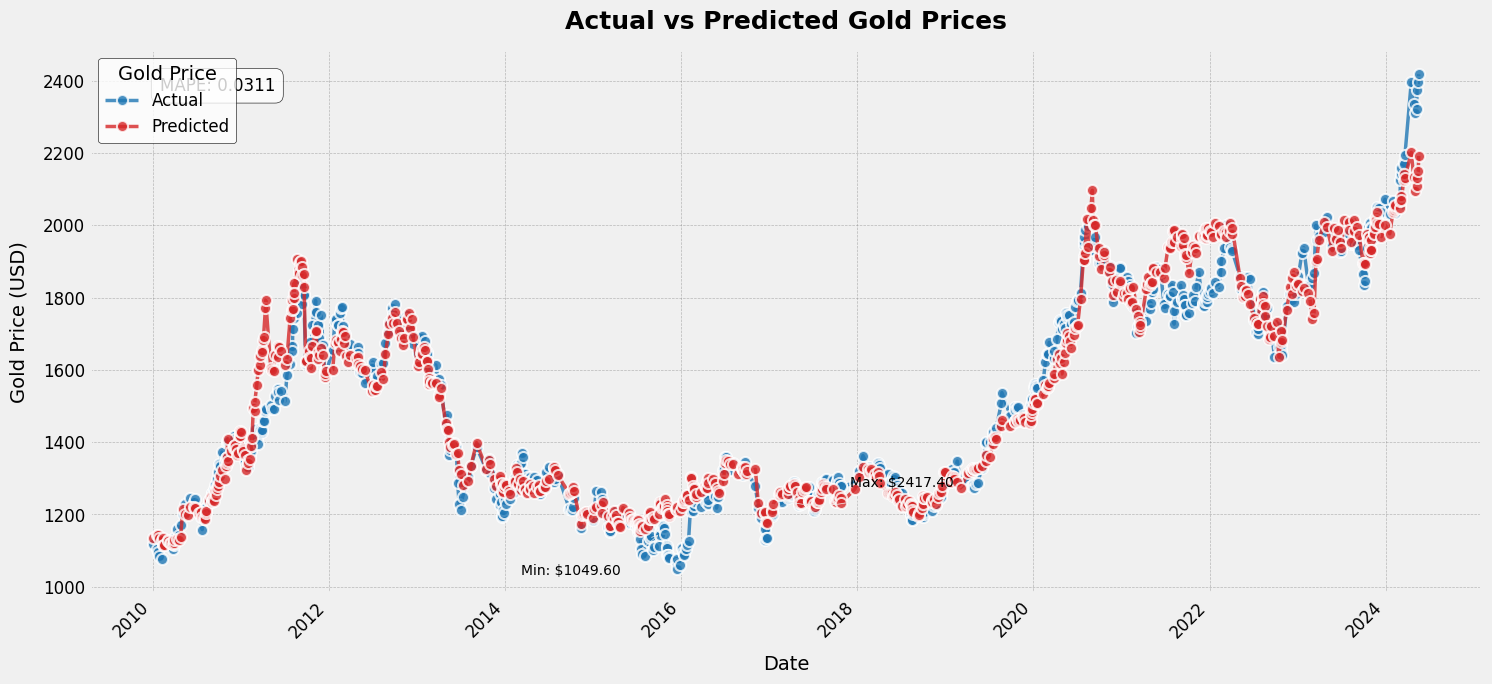

In [28]:
# Reset the index to use the date for plotting
X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

# Create a DataFrame for actual vs predicted values
comparison_df = pd.DataFrame({
    'Date': X_test['Date'],
    'Actual': y_test['next_day_gold_close'],
    'Predicted': y_pred
})

# Sort by date for better visualization
comparison_df.sort_values('Date', inplace=True)

# Set the style for better aesthetics
plt.style.use('fivethirtyeight')

# Create the figure
plt.figure(figsize=(16, 8))

# Plot actual gold prices
plt.plot(comparison_df['Date'], comparison_df['Actual'], label='Actual', color='#1f77b4', linewidth=2.5, alpha=0.8, marker='o', markersize=8, markeredgecolor='white', markeredgewidth=1.5)

# Plot predicted gold prices
plt.plot(comparison_df['Date'], comparison_df['Predicted'], label='Predicted', color='#d62728', linewidth=2.5, alpha=0.8, marker='o', markersize=8, markeredgecolor='white', markeredgewidth=1.5)

# Set title and labels with larger font sizes
plt.title('Actual vs Predicted Gold Prices', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Gold Price (USD)', fontsize=14, labelpad=10)

# Customize grid
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Improve x-axis date labels
plt.gcf().autofmt_xdate()
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add annotations for min and max points
actual_min_idx = comparison_df['Actual'].idxmin()
actual_max_idx = comparison_df['Actual'].idxmax()
pred_min_idx = comparison_df['Predicted'].idxmin()
pred_max_idx = comparison_df['Predicted'].idxmax()

plt.annotate(f'Min: ${comparison_df["Actual"].min():.2f}', xy=(comparison_df.iloc[actual_min_idx]['Date'], comparison_df.iloc[actual_min_idx]['Actual']), 
            xytext=(-100, -30), textcoords='offset points', fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.annotate(f'Max: ${comparison_df["Actual"].max():.2f}', xy=(comparison_df.iloc[actual_max_idx]['Date'], comparison_df.iloc[actual_max_idx]['Actual']), 
            xytext=(50, 10), textcoords='offset points', fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

# Enhance legend
legend = plt.legend(loc='upper left', fontsize=12, title='Gold Price', title_fontsize=14, edgecolor='black', facecolor='white')
legend.get_frame().set_alpha(0.8)

# Add MAPE score on the plot
plt.text(0.05, 0.95, f'MAPE: {mape:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black', alpha=0.8))

# Save the plot as a high-quality image
# plt.savefig('gold_price_prediction.png', dpi=300, bbox_inches='tight')
# print("The plot has been saved as 'gold_price_prediction.png'")

# Display the plot
plt.show()


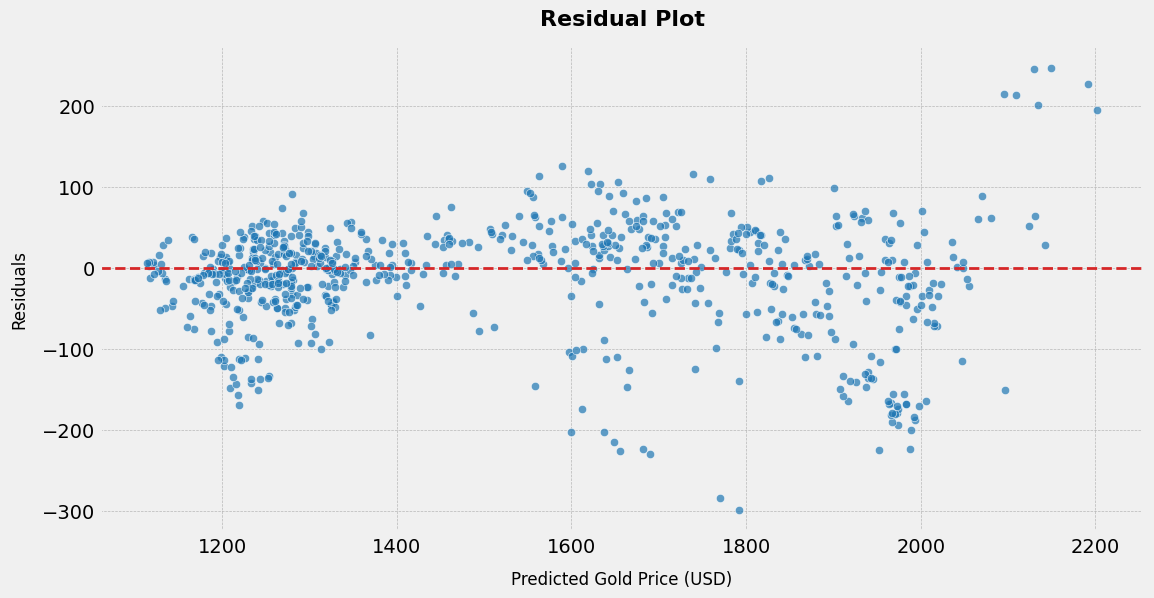

In [30]:
residuals = y_test_array - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, color='#1f77b4', alpha=0.7, edgecolor='white')
plt.axhline(y=0, color='#d62728', linestyle='--', linewidth=2)
plt.title('Residual Plot', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Predicted Gold Price (USD)', fontsize=12, labelpad=10)
plt.ylabel('Residuals', fontsize=12, labelpad=10)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

-->Phạm vi Phần dư so với Phạm vi Giá:

Phần dư: -300 đến +200 (khoảng 500 điểm)
Phạm vi giá: $1,049.6 đến $2,417.4 (khoảng 1,368 điểm)
Đánh giá: Sai số tối đa (±300) chỉ chiếm khoảng 22% của toàn bộ phạm vi giá, cho thấy mức độ chính xác tương đối tốt.


-->Tỷ lệ Sai số:

Ví dụ cụ thể:

Tại mức giá thấp ($1,049.6), sai số +200 ~ 19% (khá lớn)
Tại mức giá cao ($2,417.4), sai số -300 ~ 12.4% (chấp nhận được)


Đánh giá: Mặc dù có một số dự đoán với sai số lớn, nhưng hầu hết các điểm dữ liệu có vẻ có sai số nhỏ hơn 10%, đặc biệt là ở mức giá cao hơn. 


-->Điểm Ngoại lệ:

Các điểm có phần dư từ -300 đến +200 không còn được coi là "ngoại lệ cực đoan".
Trong thị trường biến động như vàng, chênh lệch 10-15% không phải là bất thường, đặc biệt là khi có các sự kiện lớn (ví dụ: khủng hoảng tài chính, đại dịch).
Đánh giá: Tốt. Các điểm này có thể chỉ đơn giản là phản ánh những ngày có biến động cao chứ không nhất thiết là lỗi của mô hình.


-->Phân bố Quanh y=0 và Tính Ngẫu nhiên:

Rất tích cực. Các điểm phân bố đều quanh y=0 và không có mẫu rõ ràng.
Điều này cho thấy mô hình không bị thiên vị và đã nắm bắt tốt các mối quan hệ phi tuyến tính.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2040\626899683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


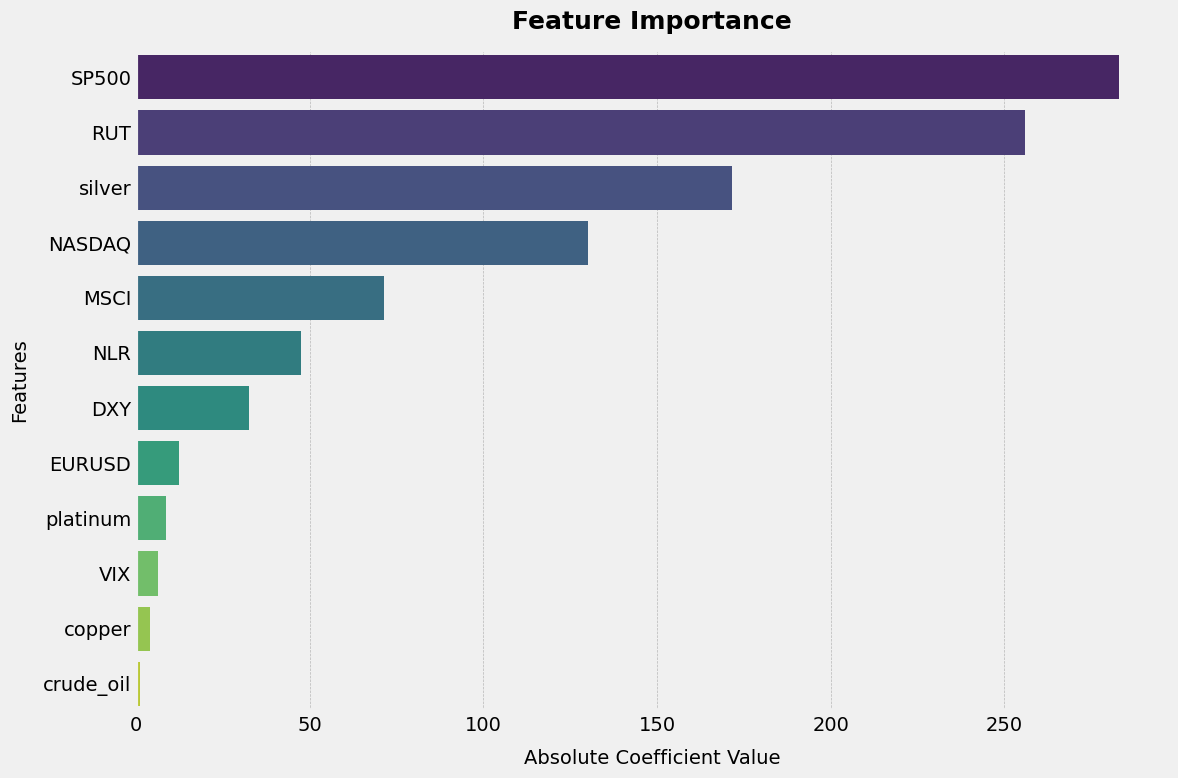

In [31]:
feature_importance = pd.Series(svr.coef_[0], index=features).abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Absolute Coefficient Value', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()